In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### PART 1 - CLASSIFICATION :

In [3]:
# UPLOADING THE DATASET:
df=pd.read_csv(r'C:\Users\Gabi\Desktop\CLASSIFICATION DATASET.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [7]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


### Purpose explenation:
##### we will try to predict by very basic data if the type of lesion that you have us cancerous, because of that we will drop the "lesion_id" and the "image_id" that showing us the pictures of the lesions.

In [13]:
# droping the lesion_id column and image_id column
df.drop('lesion_id',axis=1,inplace=True)
df.drop('image_id',axis=1,inplace=True)
df

,dx,dx_type,age,sex,localization
0,bkl,histo,80.0,male,scalp
1,bkl,histo,80.0,male,scalp
2,bkl,histo,80.0,male,scalp
3,bkl,histo,80.0,male,scalp
4,bkl,histo,75.0,male,ear
...,...,...,...,...,...
10010,akiec,histo,40.0,male,abdomen
10011,akiec,histo,40.0,male,abdomen
10012,akiec,histo,40.0,male,abdomen
10013,akiec,histo,80.0,male,face


#### explenation about the fetchers:

* localization - where(the part) of the body the lesion was found.
* sex - the sex of the human.
* age - the age of the human.
* dx - 'dx' is a short for diagnosis(wich type of lesion do you have)
* dx_type - the type of way that the diagnosis was made.

In [19]:
#checking for null in the dataset
df.isnull().sum()

dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [23]:
#showing the null by pracent.
(df.isnull().sum()/df.isnull().count())*100

dx              0.000000
dx_type         0.000000
age             0.569146
sex             0.000000
localization    0.000000
dtype: float64

In [37]:
# beacause i dont want to "lose" the information about this peaople i will give them the mean age. 
mean_age = round(df['age'].mean())
df.fillna(value = mean_age,inplace = True)

In [38]:
df.isnull().sum()

dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [79]:
# right now i have dicided to make a dictionary for "dx" to understand which one of the lesions is cancerous and there
#full names.
dx_dict = {'dx':['nv','mel','bkl','bcc','akiec','vasc','df'],
           'dx full names':['Melanocytic nevi','Melanoma','Benign keratosis','Basal cell carcinoma',
            'Actinic keratoses','Vascular lesions','Dermatofibroma'],
          'cancerous':['no','yes','no','yes','yes','no','no']}

In [80]:
df1 = pd.DataFrame(dx_dict)
df1

,dx,dx full names,cancerous
0,nv,Melanocytic nevi,no
1,mel,Melanoma,yes
2,bkl,Benign keratosis,no
3,bcc,Basal cell carcinoma,yes
4,akiec,Actinic keratoses,yes
5,vasc,Vascular lesions,no
6,df,Dermatofibroma,no


In [95]:
# as a preparing to the visualization we will make a new column with the full names.
dx_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['dx full names'] = df['dx'].map(dx_dict.get) 

In [96]:
#same as the dx but with the full name
df['dx full names'].value_counts()

Melanocytic nevi        6705
Melanoma                1113
Benign keratosis        1099
Basal cell carcinoma     514
Actinic keratoses        327
Vascular lesions         142
Dermatofibroma           115
Name: dx full names, dtype: int64

#### Vizualization:

([<matplotlib.axis.XTick at 0x173c6ca2070>,
 <a list of 7 Text major ticklabel objects>)

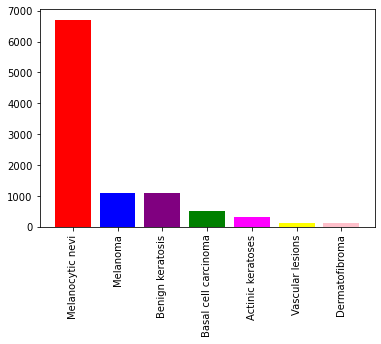

In [109]:
labels = ['Melanocytic nevi','Melanoma','Benign keratosis','Basal cell carcinoma','Actinic keratoses',
          'Vascular lesions','Dermatofibroma']
value = [6705,1113,1099,514,327,142,115]
plt.bar(labels,value,color=['red', 'blue', 'purple', 'green', 'fuchsia','yellow','pink'])
plt.xticks(labels, rotation='vertical')